# Amazon EDA project

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\data\Amazon Sale Report.csv", low_memory=False)

# Data Overview

In [7]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [9]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

# Data Cleaning

In [14]:
df = df.drop(df.columns[-1], axis=1) 
df = df.drop('index', axis=1, errors='ignore') 

In [16]:
# Removing duplicates
df = df.drop_duplicates().reset_index(drop=True)  
df.isna().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7792
Amount                 7792
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49150
B2B                       0
fulfilled-by          89692
dtype: int64

In [18]:
# Handling Missing Values
have_null_coll = ['Courier Status', 'currency', 'ship-city', 'ship-state', 'ship-country', 'promotion-ids']
for col in have_null_coll:
    df[col] = df[col].fillna(df[col].mode()[0])

In [20]:
df['Amount'] = df['Amount'].fillna(df['Amount'].median())

In [22]:
# Outlier Handling
IQR = df['Amount'].quantile(0.75) - df['Amount'].quantile(0.25)
upper_bound = df['Amount'].quantile(0.75) + 1.5 * IQR
lower_bound = df['Amount'].quantile(0.25) - 1.5 * IQR
median_value = df['Amount'].median()

In [24]:
df['Amount'] = df['Amount'].apply(lambda x: median_value if x > upper_bound or x < lower_bound else x)
df['Amount'] = df['Amount'].apply(lambda x: median_value if x == 0 else x)

# Exploratory Data Analysis (EDA)

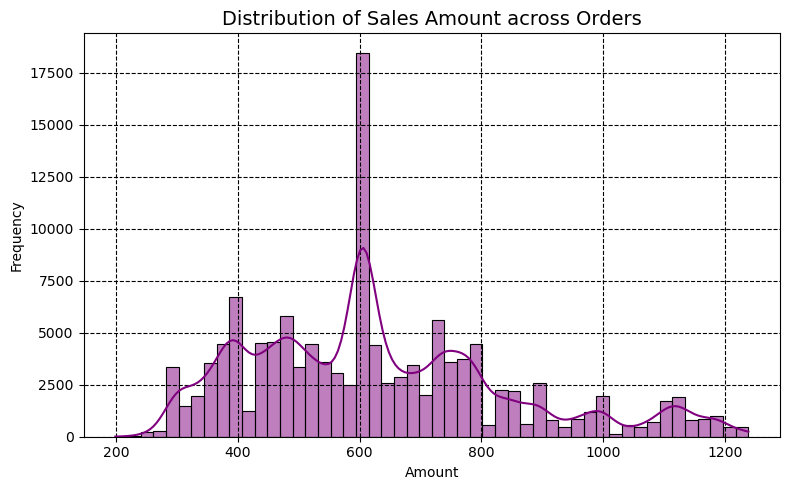

In [27]:
# Sales Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Amount'].dropna(), bins=50, kde=True, color='purple')
plt.grid(linestyle='--', color='#000000')
plt.title("Distribution of Sales Amount across Orders", fontsize=14)
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [29]:
# Top 5 Trending Products
top5_products = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(5)

In [31]:
top5_products

Category
Set              38581957.01
kurta            23692693.22
Western Dress    11724761.12
Top               5721433.30
Ethnic Dress       832975.66
Name: Amount, dtype: float64

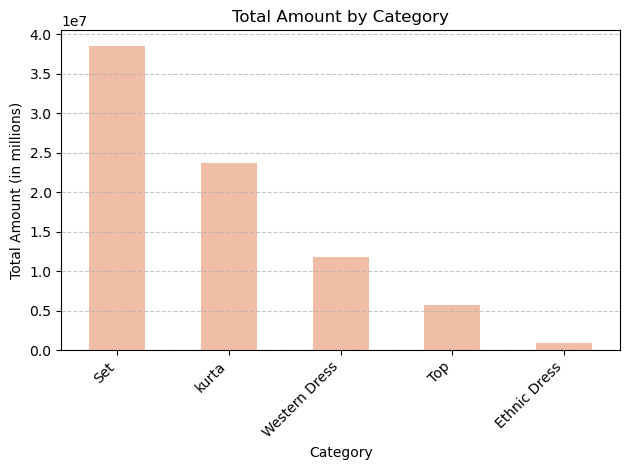

In [33]:
top5_products.plot(kind='bar', color='#f0bda7', title='Total Amount by Category')
plt.ylabel('Total Amount (in millions)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [35]:
# Top 5 Cities by Sales
top5_cities = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(5)

In [37]:
top5_cities

ship-city
BENGALURU    7058584.03
HYDERABAD    5094404.89
MUMBAI       3802823.69
NEW DELHI    3752356.03
CHENNAI      3233757.37
Name: Amount, dtype: float64

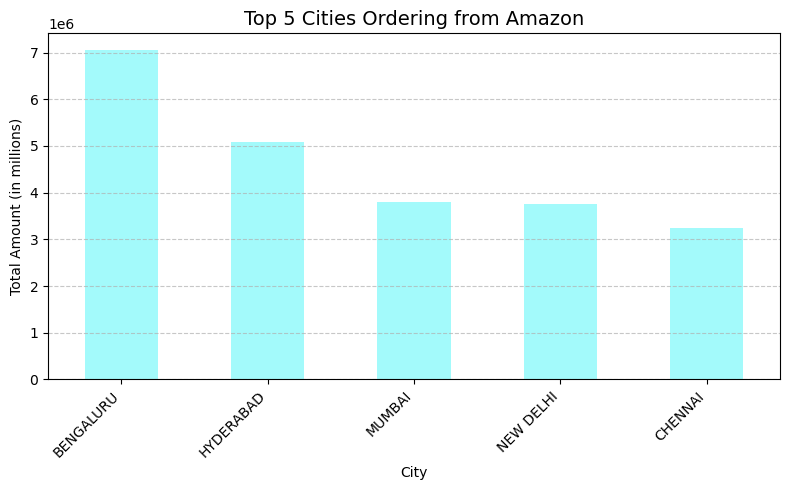

In [39]:
# Top 5 cities by total sales amount
top5_cities = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 5))
top5_cities.plot(kind='bar', color='#a3fafb')
plt.title("Top 5 Cities Ordering from Amazon", fontsize=14)
plt.xlabel("City")
plt.ylabel("Total Amount (in millions)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [41]:
# Total orders and sales
Total_Qty_ordered = df['Qty'].sum()

In [43]:
Total_Sales = df['Amount'].sum()

In [45]:
# Sales per order
Sales_Order_wise = df.groupby('Order ID').agg({'Qty': 'count', 'Amount': 'sum'})

In [47]:
Sales_Order_wise

,Qty,Amount
Order ID,,
171-0000547-8192359,1,301.0
171-0000902-4490745,1,544.0
171-0001409-6228339,1,422.0
171-0003082-5110755,1,563.0
171-0003738-2052324,1,379.0
...,...,...
S02-9578181-3610412,1,605.0
S02-9599483-2736812,1,605.0
S02-9649067-3246849,1,605.0


In [49]:
Top5_seller_by_qt = Sales_Order_wise.sort_values(by='Qty', ascending=False).head(5)

In [51]:
Top5_seller_by_qt

,Qty,Amount
Order ID,,
403-4984515-8861958,12,5923.00
171-5057375-2831560,12,6227.62
404-9932919-6662730,11,5789.00
403-0173977-3041148,11,5976.00
408-3317403-1729937,10,5986.00


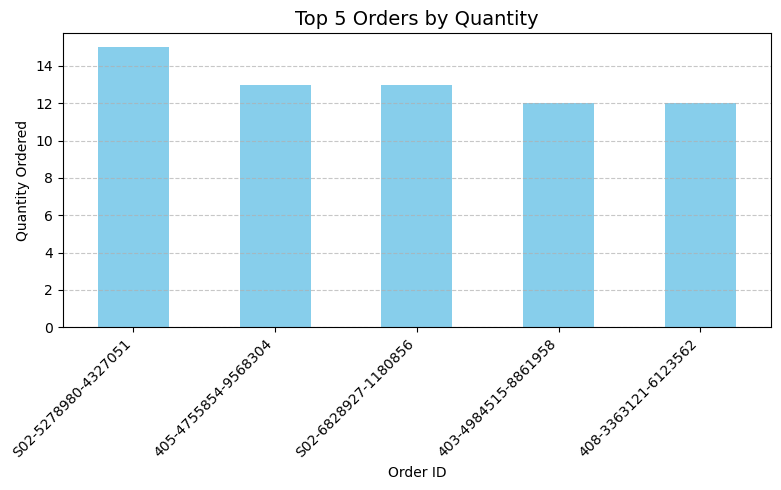

In [53]:
# Top 5 orders by quantity
top5_orders_by_qty = df.groupby("Order ID")["Qty"].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 5))
top5_orders_by_qty.plot(kind='bar', color='skyblue')
plt.title("Top 5 Orders by Quantity", fontsize=14)
plt.xlabel("Order ID")
plt.ylabel("Quantity Ordered")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

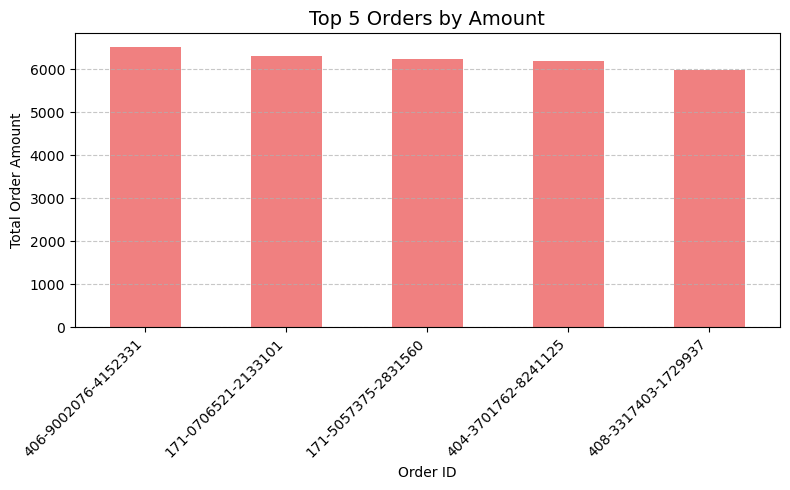

In [55]:
# Top 5 orders by amount
top5_orders_by_amount = df.groupby("Order ID")["Amount"].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 5))
top5_orders_by_amount.plot(kind='bar', color='lightcoral')
plt.title("Top 5 Orders by Amount", fontsize=14)
plt.xlabel("Order ID")
plt.ylabel("Total Order Amount")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [57]:
# Sales Trends Over Time
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [58]:
# Top 5 selling dates
Orders_date_wise = df.groupby('Date').agg({'Qty': 'count', 'Amount': 'sum'}).sort_values(by='Amount', ascending=False).head(5)

In [59]:
# Top 5 quantity ordered by date
Orders_qt = df.groupby('Date').agg({'Qty': 'count', 'Amount': 'sum'}).sort_values(by='Qty', ascending=False).head(5)

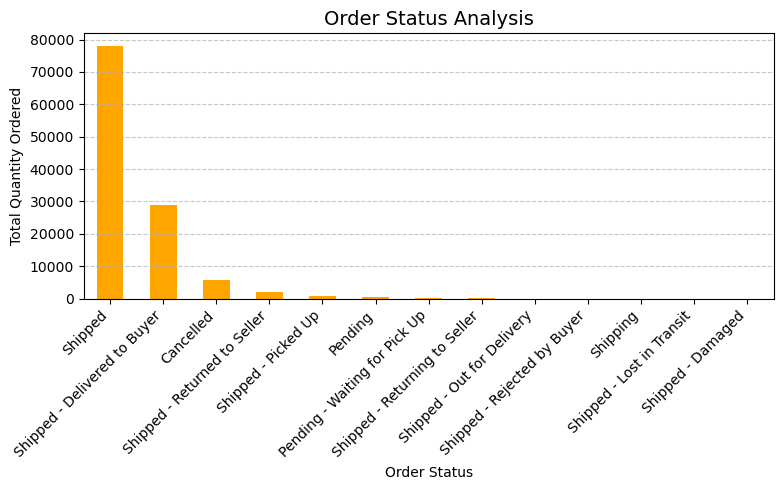

In [60]:
# Order status analysis
order_status = df.groupby("Status").agg({"Qty": "sum", "Amount": "sum"}).sort_values(by="Qty", ascending=False)
plt.figure(figsize=(8, 5))
order_status["Qty"].plot(kind='bar', color='orange')
plt.title("Order Status Analysis", fontsize=14)
plt.xlabel("Order Status")
plt.ylabel("Total Quantity Ordered")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

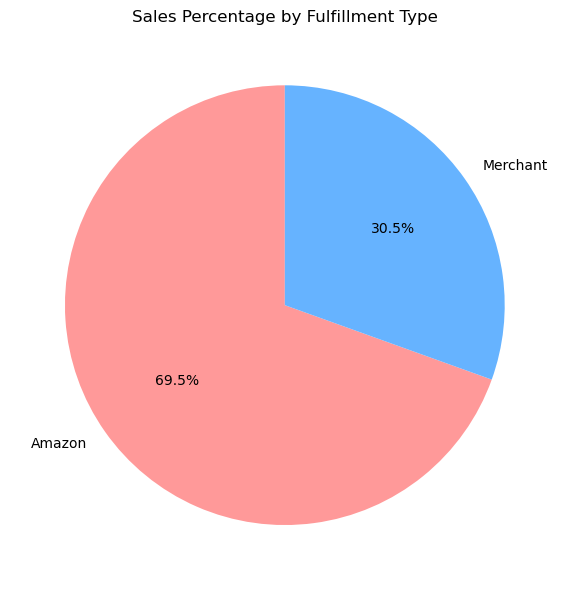

In [61]:
# Sales by Fulfillment Type
sales_fulfillment = df.groupby('Fulfilment')['Amount'].sum()
plt.figure(figsize=(6, 6))
sales_fulfillment.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("Sales Percentage by Fulfillment Type")
plt.ylabel('')
plt.tight_layout()
plt.show()